In [3]:
from zipfile import ZipFile as zf
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"#running personal copy of jupyter and tesseract

small_file = 'readonly/small_img.zip'
large_file = 'readonly/images.zip'

class Face_Search():

    def __init__(self, text_to_search, file):
        self.images = []
        self.image_names = []
        self.image_dict = {}
        self.zfile = file
        self.phrase = text_to_search

    def image_to_dict(self):
        with zf(self.zfile) as zip:
            namelist = zip.namelist()
            for name in namelist:
                self.image_names.append(name)
            for info in zip.infolist():
                with zip.open(info) as file:
                    self.image=Image.open(file).convert('RGB')
                    self.images.append(self.image)
        pos = 0
        for name in self.image_names:
            self.image_dict[name] = [self.images[pos], [],[]]
            pos+=1
        return self.image_dict

#     def binarize(self, image_to_transform, threshold):
#         output_image=image_to_transform.convert("L")
#         for x in range(output_image.width):
#             for y in range(output_image.height):
#                 if output_image.getpixel((x,y))< threshold:
#                     output_image.putpixel( (x,y), 0 )
#                 else:
#                     output_image.putpixel( (x,y), 255 )
#         return output_image

    def text_to_dict(self):
        for key in self.image_dict:
            #image = self.binarize((self.image_dict[key][0]), 128)
            image = self.image_dict[key][0]
            text = pytesseract.image_to_string(image)
            text = text.replace('\n',' ')
            text = text.replace('- ','')
            text = text.upper()
            self.image_dict[key][2] = text
        return self.image_dict

    def get_cs_size(self,lst):
        x = 500
        y = len(lst)
        if y % 5 != 0:
            y = ((y//5)+1)*100
        else: y = (y//5)*100
        return (x,y)

    def contact_sheet(self, face_list):
        size = self.get_cs_size(face_list)
        new_image = Image.new('RGB', size)
        return new_image

    def make_cs(self, face_image):
        open_cv_image = np.array(face_image) #pil.image
        open_cv_image = open_cv_image[:, :, ::-1].copy()
        gray = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
        cv_img_bin=cv.threshold(gray,184,225,cv.THRESH_BINARY)[1]
        faces = face_cascade.detectMultiScale(cv_img_bin, 1.1292441, 10)
        try:
            rec = faces.tolist()
            rec.reverse()
            contactsheet = self.contact_sheet(rec)
            x = 0
            y = 0
            for face in rec:
                #print(face)
                copy = face_image.copy()
                region = copy.crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
                region.thumbnail((100,100))
                image_placeholder = Image.new('RGB', (100,100))
                image_placeholder.paste(region,(0,0))
                contactsheet.paste(region,(x,y))
                if x + image_placeholder.width == contactsheet.width:
                    x = 0
                    y = y + image_placeholder.height
                else:
                    x = x + image_placeholder.width
            return contactsheet
        except: return 'But there were no faces in that file!'

    def cs_to_dict(self):
        for key in self.image_dict:
            image = self.image_dict[key][0]
            self.image_dict[key][1] = self.make_cs(self.image_dict[key][0])
        return self.image_dict

    def word_search(self):
        for key in self.image_dict:
            if self.phrase in self.image_dict[key][2]:
                print('Results found in file {}'.format(key))
                display(self.image_dict[key][1])


Results found in file a-0.png


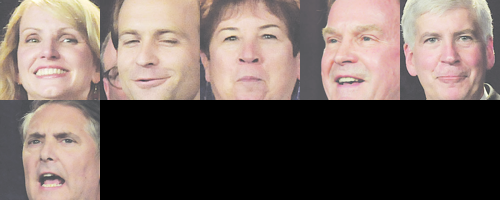

Results found in file a-3.png


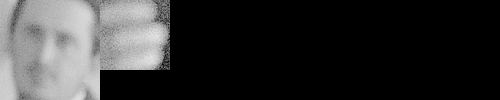

In [4]:
chris = Face_Search('CHRISTOPHER', small_file)
chris.image_to_dict()
chris.cs_to_dict()
chris.text_to_dict()
chris.word_search()

Results found in file a-0.png


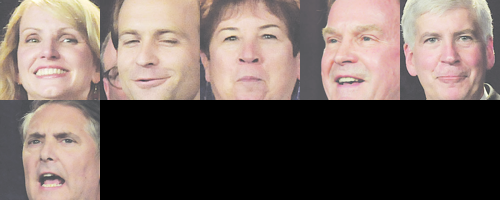

Results found in file a-1.png


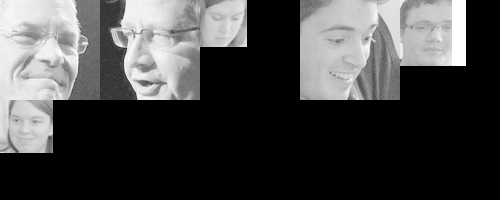

Results found in file a-10.png


'But there were no faces in that file!'

Results found in file a-13.png


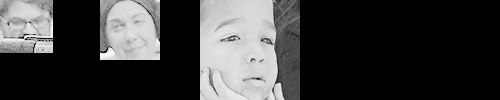

Results found in file a-2.png


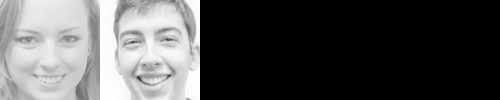

Results found in file a-3.png


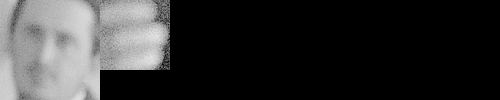

Results found in file a-5.png


'But there were no faces in that file!'

Results found in file a-8.png


'But there were no faces in that file!'

Results found in file a-9.png


'But there were no faces in that file!'

In [7]:
mark = Face_Search('MARK', large_file)
mark.image_to_dict()
mark.cs_to_dict()
mark.text_to_dict()
mark.word_search()